# Section 2. Clustering

> Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import cv2

> Read in the data:
 Class Label,
 \# of times Pregnant, 
 Plasma Glucose Concentration, 
 Diastolic Blood Pressure (mm Hg), 
 Triceps skin fold thickness (mm),
 Insulin (mm U/ml), 
 Body mass index (kg/m^2)
 Diabetes pedigree function
 Age (yrs)

In [2]:
# Read in the data
data = np.genfromtxt('diabetes.csv', delimiter=',')
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into pcaX and Y vectors
X = dataMat[:, 1:]
Y =  np.reshape(dataMat[:, 0], (-1, 1))

class_labels = {-1, 1}

> Standardize Features

In [3]:
mean = X.mean(axis=0)
std = X.std(axis=0, ddof=1)
####################################################################
X_std = (X - mean) / std

> Define myKMeans function

Setting up initial 2 reference vector(s)
Beginning k-means algorithm
Initial Center for C_0: Vec3([3.60032105 1.72751558 2.74606319])
Initial Center for C_1: Vec3([2.09248496 0.62280934 1.1188432 ])
classes=[0, 1]
Counter({-1.0: 4, 1.0: 1})
Counter({1.0: 499, -1.0: 264})


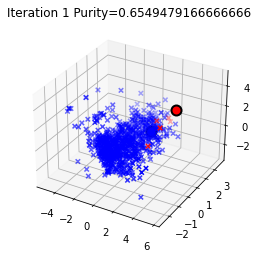

Counter({-1.0: 175, 1.0: 139})
Counter({1.0: 361, -1.0: 93})


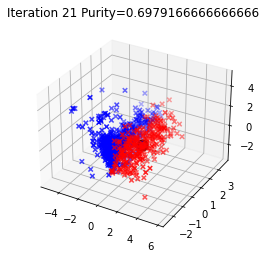

In [4]:
def myKMeans(X, Y, k):
    plt.rcParams['figure.figsize'] = [20, 10]
    k = min(k, 7)
    if X.shape[1] > 3:
        pca = PCA(n_components=3)
        pcaX = pca.fit_transform(X)
    Dx = np.tile(pcaX[:,0].reshape(-1,1), (1,k))
    Dy = np.tile(pcaX[:,1].reshape(-1,1), (1,k))
    Dz = np.tile(pcaX[:,2].reshape(-1,1), (1,k))

    print(f"Setting up initial {k} reference vector(s)")
    x_min, x_max = np.min(pcaX[:,0]), np.max(pcaX[:,0])
    y_min, y_max = np.min(pcaX[:,1]), np.max(pcaX[:,1])
    z_min, z_max = np.min(pcaX[:,2]), np.max(pcaX[:,2])

    ref_x = np.random.default_rng().uniform(low=x_min, high=x_max, size=k)
    ref_y = np.random.default_rng().uniform(low=y_min, high=y_max, size=k)
    ref_z = np.random.default_rng().uniform(low=z_min, high=z_max, size=k)


    print("Beginning k-means algorithm")
    centers = [np.array([ref_x, ref_y, ref_z])]
    for c in range(k):
        print(f'Initial Center for C_{c}: Vec3({centers[0][:,c]})')
        
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    classes = [i for i in range(len(np.unique(Y)))]
    print(f'{classes=}')
    terminator = 2 ** (-23)
    N = len(Y)

    i = 1
    while True:
        subx = Dx - ref_x
        suby = Dy - ref_y
        subz = Dz - ref_z

        sqx = subx ** 2
        sqy = suby ** 2
        sqz = subz ** 2

        l2 = np.sqrt(sqx + sqy + sqz)
        clusters = np.argmin(l2, axis=1)
        
        if i == 1:
            tot = 0
            fig1 = plt.figure()
            ax1 = fig1.add_subplot(projection='3d')
            for cluster in range(k):
                idx = np.where(clusters == cluster)
                counts = Counter(Y[idx].reshape(1,-1)[0])
                print(counts)
                tot += max(counts.values())
                xs = pcaX[idx,0]
                ys = pcaX[idx,1]
                zs = pcaX[idx,2]
                ax1.scatter(xs, ys, zs, marker="x", color = colors[cluster])
                ax1.scatter(ref_x[cluster], ref_y[cluster], ref_z[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
            
            ax1.set_title(f'Iteration {i} Purity={tot/N}')
            plt.show()
        else:
            ref_x = []
            ref_y = []
            ref_z = []

            for cluster in range(k):
                idx = np.where(clusters == cluster)
                ref_x.append(np.mean(pcaX[idx,0]))
                ref_y.append(np.mean(pcaX[idx,1]))
                ref_z.append(np.mean(pcaX[idx,2]))
            centers.append(np.array([ref_x, ref_y, ref_z]))
            
            
            if np.abs((centers[-1] - centers[-2])).sum(axis=1).sum() < terminator:
                break
        i+=1

    tot=0
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    for cluster in range(k):
        idx = np.where(clusters == cluster)
        counts = Counter(Y[idx].reshape(1,-1)[0])
        print(counts)
        tot += max(counts.values())
        xs = pcaX[idx,0]
        ys = pcaX[idx,1]
        zs = pcaX[idx,2]
        ax2.scatter(xs, ys, zs, marker="x", color = colors[cluster])
        ax2.scatter(ref_x[cluster], ref_y[cluster], ref_z[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
    
    ax2.set_title(f'Iteration {i} Purity={tot/N}')
    plt.show()

myKMeans(X_std, Y, k=2)

In [6]:
def myKMeansVideo(X, Y, k):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.ioff()
    k = min(k, 7)
    if X.shape[1] > 3:
        pca = PCA(n_components=3)
        pcaX = pca.fit_transform(X)
    features = pcaX.shape[1]
    print(f'{features=}')
    Dx = np.tile(pcaX[:,0].reshape(-1,1), (1,k))
    Dy = np.tile(pcaX[:,1].reshape(-1,1), (1,k))
    Dz = np.tile(pcaX[:,2].reshape(-1,1), (1,k))

    print(f"Setting up initial {k} reference vector(s)")
    x_min, x_max = np.min(pcaX[:,0]), np.max(pcaX[:,0])
    y_min, y_max = np.min(pcaX[:,1]), np.max(pcaX[:,1])
    z_min, z_max = np.min(pcaX[:,2]), np.max(pcaX[:,2])

    ref_x = np.random.default_rng().uniform(low=x_min, high=x_max, size=k)
    ref_y = np.random.default_rng().uniform(low=y_min, high=y_max, size=k)
    ref_z = np.random.default_rng().uniform(low=z_min, high=z_max, size=k)


    print("Beginning k-means algorithm")
    centers = [np.array([ref_x, ref_y, ref_z])]
    for c in range(k):
        print(f'Initial Center for C_{c}: Vec3({centers[0][:,c]})')
        
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    classes = [i for i in range(len(np.unique(Y)))]
    print(f'{classes=}')
    terminator = 2 ** (-23)
    N = len(Y)
    fig = plt.figure()
    save_path = f'K_{k}.mp4v'
    cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    size = (1440, 720)
    fps = 5
    vw = cv2.VideoWriter(save_path, cv2_fourcc, fps, size)

    i = 1
    while True:
        subx = Dx - ref_x
        suby = Dy - ref_y
        subz = Dz - ref_z

        sqx = subx ** 2
        sqy = suby ** 2
        sqz = subz ** 2

        l2 = np.sqrt(sqx + sqy + sqz)
        clusters = np.argmin(l2, axis=1)
        
        tot = 0
        fig = plt.figure()
        if features > 2:
            ax = fig.add_subplot(projection='3d')
        else:
            ax = fig
        for cluster in range(k):
            idx = np.where(clusters == cluster)
            counts = Counter(Y[idx].reshape(1,-1)[0])
            # print(counts)
            tot += max(counts.values())
            xs = pcaX[idx,0]
            ys = pcaX[idx,1]
            if features > 2:
                zs = pcaX[idx,2]
                ax.scatter(xs, ys, zs, marker="x", color = colors[cluster])
                ax.scatter(ref_x[cluster], ref_y[cluster], ref_z[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
            else:
                ax.scatter(xs, ys, marker="x", color = colors[cluster])
                ax.scatter(ref_x[cluster], ref_y[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
        ax.set_title(f'Iteration {i} Purity={tot/N}')
        fig.canvas.draw()
        
        # Saving image
        img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
        img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        vw.write(img)
        plt.close(fig)

        ref_x = []
        ref_y = []
        ref_z = []

        for cluster in range(k):
            idx = np.where(clusters == cluster)
            ref_x.append(np.mean(pcaX[idx,0]))
            ref_y.append(np.mean(pcaX[idx,1]))
            ref_z.append(np.mean(pcaX[idx,2]))
        centers.append(np.array([ref_x, ref_y, ref_z]))
        
        
        if np.abs((centers[-1] - centers[-2])).sum(axis=1).sum() < terminator:
            break
        
        i+=1

    tot = 0
    fig = plt.figure()
    if features > 2:
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig
    for cluster in range(k):
        idx = np.where(clusters == cluster)
        counts = Counter(Y[idx].reshape(1,-1)[0])
        # print(counts)
        tot += max(counts.values())
        xs = pcaX[idx,0]
        ys = pcaX[idx,1]
        if features > 2:
            zs = pcaX[idx,2]
            ax.scatter(xs, ys, zs, marker="x", color = colors[cluster])
            ax.scatter(ref_x[cluster], ref_y[cluster], ref_z[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
        else:
            ax.scatter(xs, ys, marker="x", color = colors[cluster])
            ax.scatter(ref_x[cluster], ref_y[cluster], s=100, marker="o", color = colors[cluster], edgecolors='black', linewidths=2)
    ax.set_title(f'Iteration {i} Purity={tot/N}')
    fig.canvas.draw()
    
    # Saving image
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    vw.write(img)
    plt.close(fig)
    vw.release()

myKMeansVideo(X_std, Y, k=2)
myKMeansVideo(X_std, Y, k=3)
myKMeansVideo(X_std, Y, k=4)
myKMeansVideo(X_std, Y, k=5)


features=3
Setting up initial 2 reference vector(s)
Beginning k-means algorithm
Initial Center for C_0: Vec3([4.49431944 0.26336758 0.0576239 ])
Initial Center for C_1: Vec3([-0.29828292 -1.51935107  0.43119453])
classes=[0, 1]


C:\Users\antho\AppData\Local\Temp\ipykernel_36860\926662830.py:78: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\antho\AppData\Local\Temp\ipykernel_36860\926662830.py:125: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


features=3
Setting up initial 5 reference vector(s)
Beginning k-means algorithm
Initial Center for C_0: Vec3([-1.02097325 -0.9226454   3.00465269])
Initial Center for C_1: Vec3([-2.00295579 -0.5274625   1.18521937])
Initial Center for C_2: Vec3([2.99620051 1.04632635 4.46835543])
Initial Center for C_3: Vec3([ 0.12855094  3.52524679 -1.59379243])
Initial Center for C_4: Vec3([ 4.87527834  3.57697279 -1.5132085 ])
classes=[0, 1]


C:\Users\antho\AppData\Local\Temp\ipykernel_36860\926662830.py:78: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\antho\AppData\Local\Temp\ipykernel_36860\926662830.py:125: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>